In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from keras.preprocessing import image

Using TensorFlow backend.


In [4]:
from keras.applications import VGG16

# VGG16 was designed to work on 200 x 200 pixel input images sizes
img_rows = 200
img_cols = 200 

#Loads the VGG16 model 
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [5]:
# Let's print our layers 
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [6]:
for layer in model.layers:
    layer.trainable = False

In [7]:
def addTopModel(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(1024, activation = "relu")(top_model)
    top_model = Dense(1024 , activation = "relu")(top_model)
    top_model = Dense(512 , activation = "relu")(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 3

FC_Head = addTopModel(model, num_classes)

modelnew = Model(inputs=model.input, outputs=FC_Head)

print(modelnew.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'C:/Users/AJAY KUMAR/Desktop/FACE_RECOG/FR_BY_TF/TRAIN/'
validation_data_dir = 'C:/Users/AJAY KUMAR/Desktop/FACE_RECOG/FR_BY_TF/VALIDATION/'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 12
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
    

Found 255 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


In [10]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("face.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 1190
nb_validation_samples = 170
epochs = 3
batch_size = 16

history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)
modelnew.save("face.h5")

Epoch 1/3
74/74 [==============================] - 204s 3s/step - loss: 2.5514 - accuracy: 0.6631 - val_loss: 0.3192 - val_accuracy: 0.6752

Epoch 00001: val_loss improved from inf to 0.31916, saving model to face.h5
Epoch 2/3
74/74 [==============================] - 201s 3s/step - loss: 0.3568 - accuracy: 0.9547 - val_loss: 8.1079e-05 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.31916 to 0.00008, saving model to face.h5
Epoch 3/3
74/74 [==============================] - 201s 3s/step - loss: 0.2825 - accuracy: 0.9710 - val_loss: 2.5166e-07 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00008 to 0.00000, saving model to face.h5


In [12]:
from keras.models import load_model
m= load_model('face.h5')
timage= image.load_img('image32.jpg', target_size=(200,200,3))

In [35]:
#timage= image.load_img('C:/Users/AJAY KUMAR/Desktop/FACE_RECOG/FR_BY_TF/image.jpg', target_size=(200,200,3))

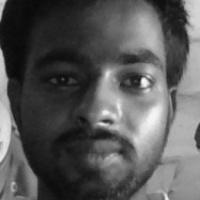

In [13]:
type(timage)
timage


In [14]:
timage= image.img_to_array(timage)

In [15]:
timage= np.expand_dims(timage, axis=0)

In [16]:
result= m.predict(timage)

In [17]:
result

array([[0.000000e+00, 1.000000e+00, 1.722216e-33]], dtype=float32)

In [18]:
result2= train_generator.class_indices

In [19]:
result2

{'ajay': 0, 'sivaji': 1, 'suraj': 2}

In [20]:
classname= ['ajay','sivaji','suraj']

In [24]:
final_result= classname[np.argmax(result)]